# Road Traffic Severity Classification Prediction
This dataset is collected from Addis Ababa Sub-city police departments for master's
research work. The data set has been prepared from manual records of road traffic
accidents of the year 2017-20. All the sensitive information has been excluded during data
encoding and finally it has 32 features and 12316 instances of the accident. Then it is
preprocessed and for identification of major causes of the accident by analyzing it using
different machine learning classification algorithms.

In [2]:
# ! pip install dabl shap imbalanced-learn evidently

In [5]:
# Import libraries for EDA and other tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import dabl
import evidently
pd.pandas.set_option('display.max_columns',None)
from imblearn.over_sampling import SMOTE

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.svm import SVC

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
## Explainable AI
import shap
# to do model comparison and determine how and why a model is performing better than the others
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset
from evidently.pipeline.column_mapping import ColumnMapping

In [6]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("RTA Dataset.csv")

In [7]:
# showing a random sample of 5 rows to ensure dataset is uploaded correctly
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7490,18:25:00,Wednesday,31-50,Male,High school,Employee,Above 10yr,NaN,Owner,NaN,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,3,1,Going straight,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
394,8:10:00,Monday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Below 1yr,NaN,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Wet or damp,Daylight,Fog or mist,Vehicle with vehicle collision,2,1,Moving Backward,Pedestrian,Male,18-30,3,Driver,Normal,"Walking along in carriageway, facing traffic",Moving Backward,Slight Injury
7822,8:20:00,Monday,18-30,Male,Elementary school,Employee,Above 10yr,Automobile,NaN,NaN,NaN,NaN,NaN,NaN,Crossing,Asphalt roads,Wet or damp,Daylight,Normal,Rollover,2,1,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury
5500,10:55:00,Sunday,18-30,Male,Elementary school,Employee,5-10yr,Stationwagen,Owner,5-10yrs,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads with some distress,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
6417,7:49:00,Wednesday,Under 18,Male,Junior high school,Employee,5-10yr,Automobile,Owner,NaN,NaN,Office areas,Two-way (divided with broken lines road marking),Tangent road with mild grade and flat terrain,T Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,3,2,Other,Driver or rider,Female,18-30,3,NaN,NaN,Not a Pedestrian,No distancing,Serious Injury


In [8]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [9]:
# Display information about columns and dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [12]:
# Statistical summary of numerical and then all columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [13]:
df.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12316.000000,12316.000000,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,NaN,NaN,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,NaN,NaN,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,NaN,NaN,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.040679,1.548149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688790,1.007179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Visualization

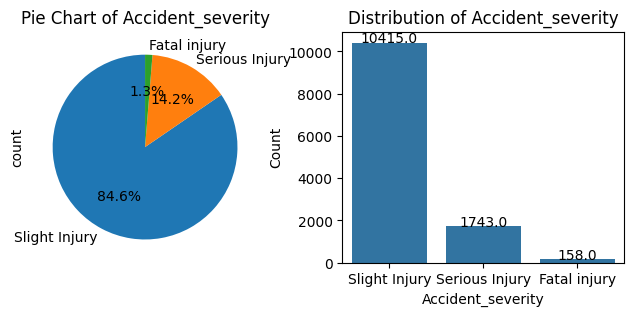

In [14]:
target_variable = 'Accident_severity'

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Pie chart for the target variable
df[target_variable].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title(f'Pie Chart of {target_variable}')

# Bar graph with count labels on top of each bar
sns.countplot(data=df, x=target_variable, ax=axes[1])
axes[1].set_title(f'Distribution of {target_variable}')
axes[1].set_xlabel(target_variable)
axes[1].set_ylabel('Count')

# Display the count labels on top of each bar in the bar graph
for patch in axes[1].patches:
    height = patch.get_height()
    axes[1].text(patch.get_x() + patch.get_width() / 2, height + 0.3, f'{height}', ha='center')

# Display the plots
plt.show()

In [15]:
# before further analysis, we will convery time into hour of day
# and use this as a proper categorical variable
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Time'] = df['Time'].dt.hour
     

In [17]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


Number of Categorical Variables: 29


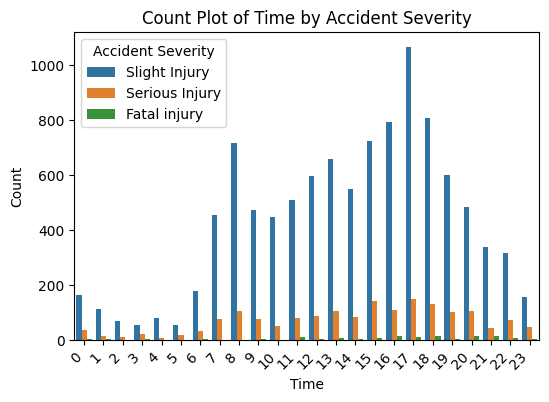

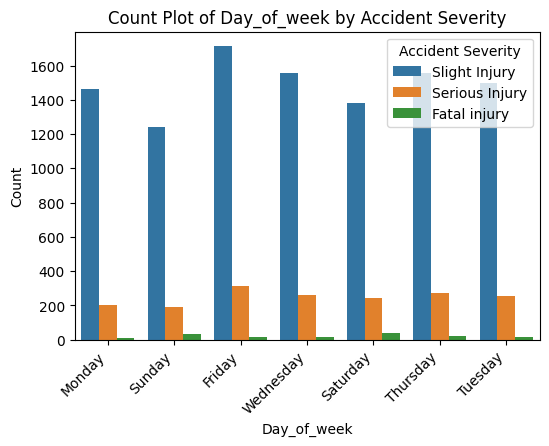

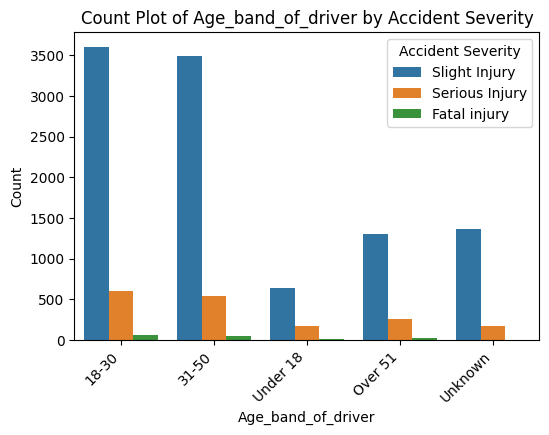

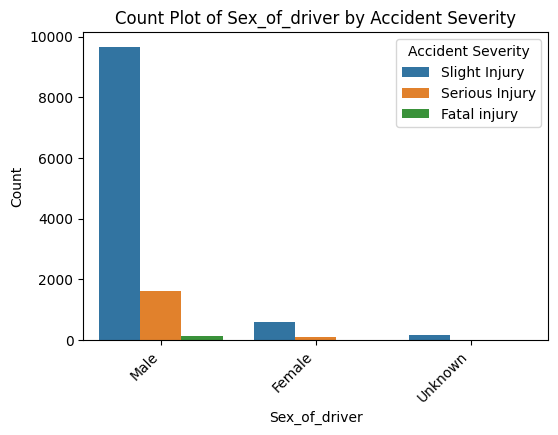

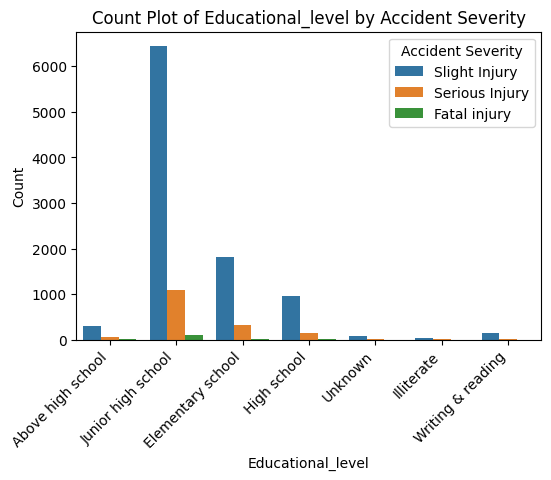

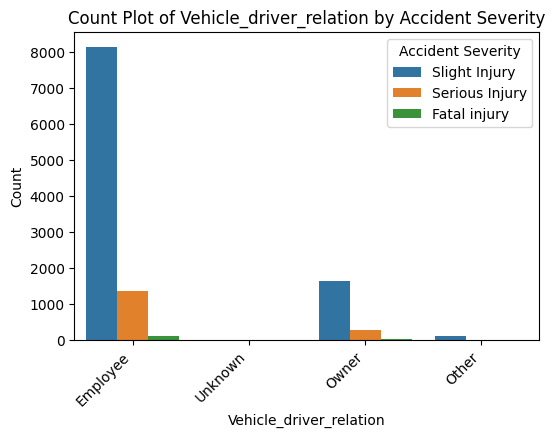

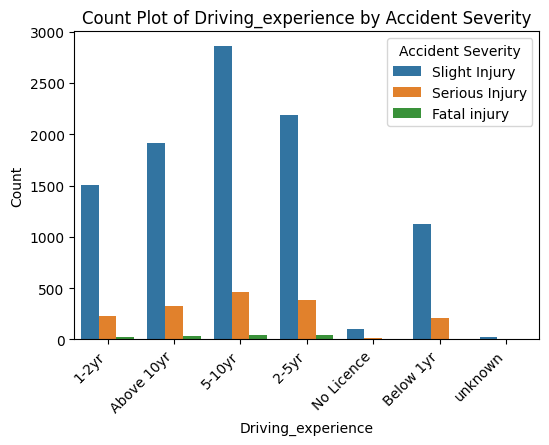

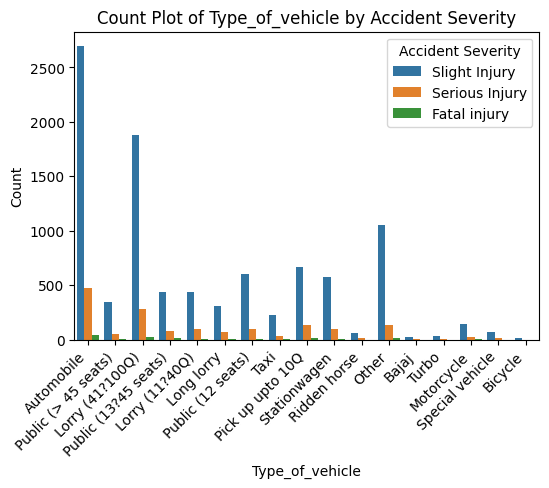

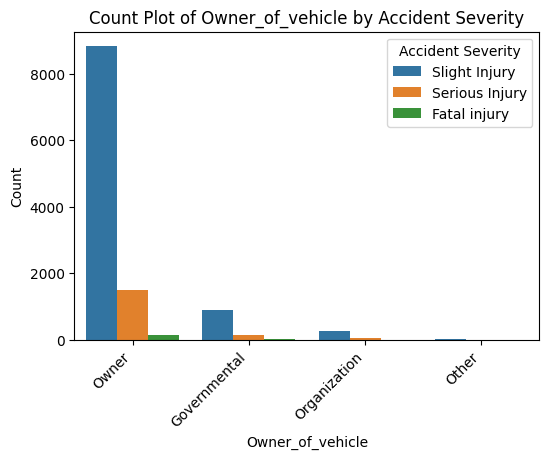

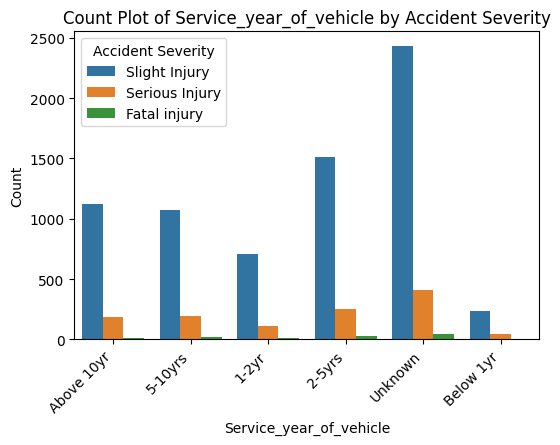

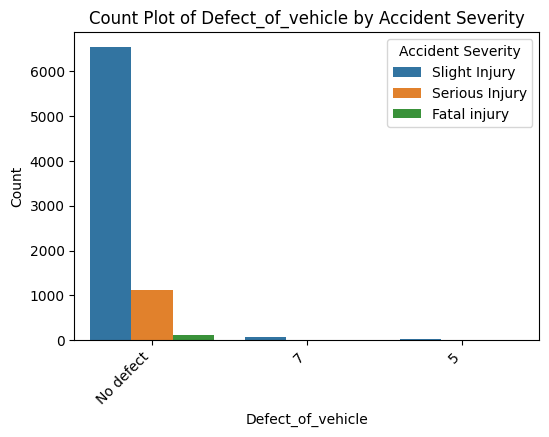

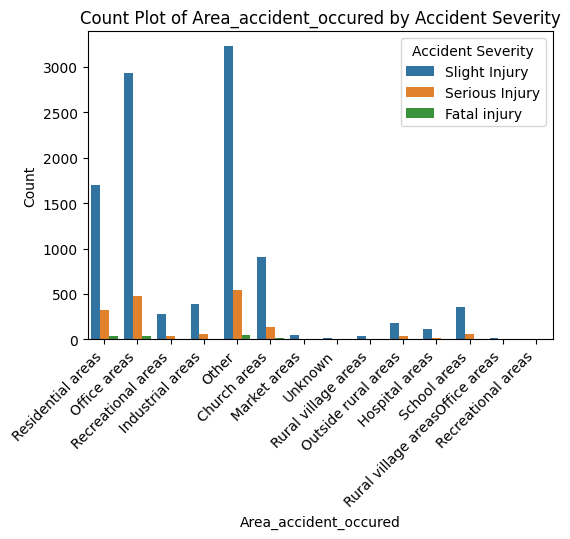

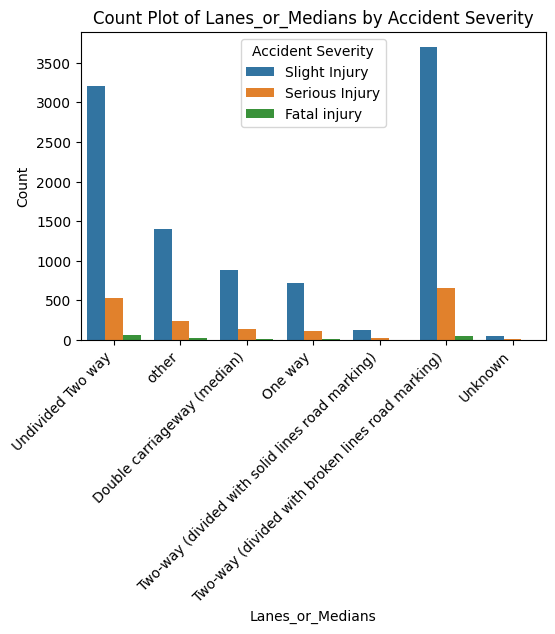

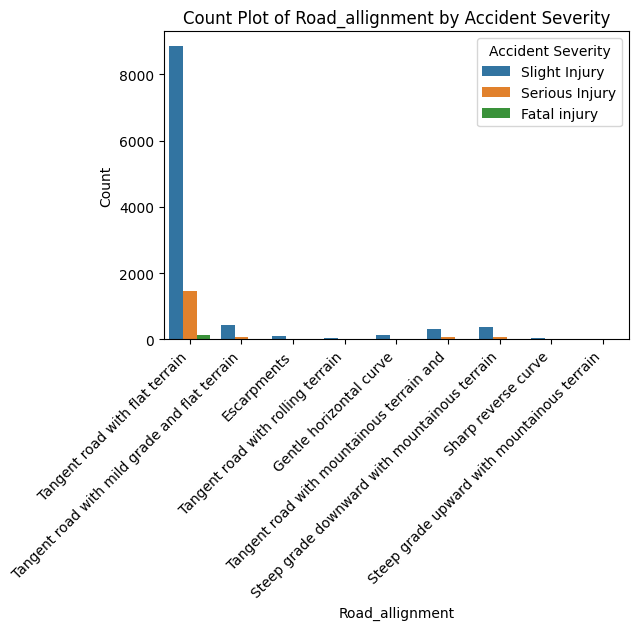

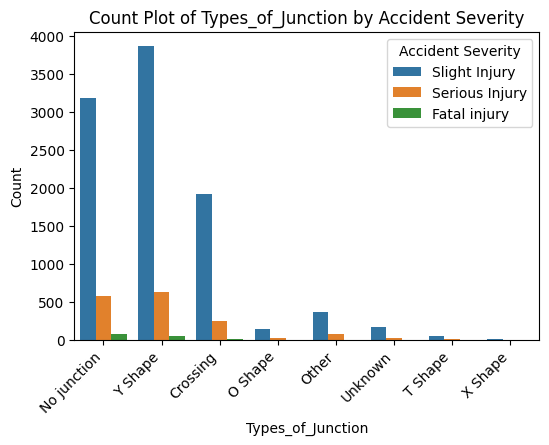

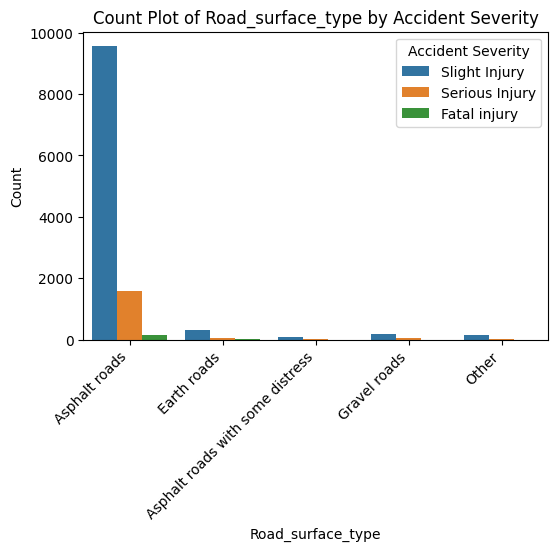

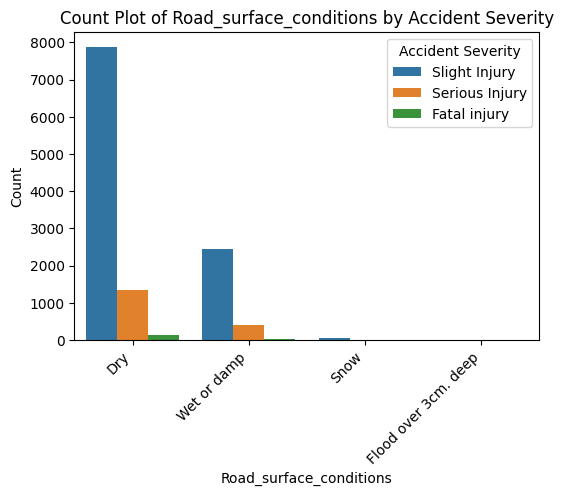

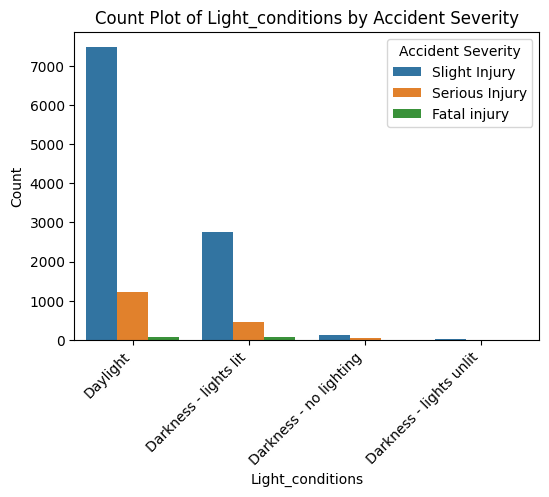

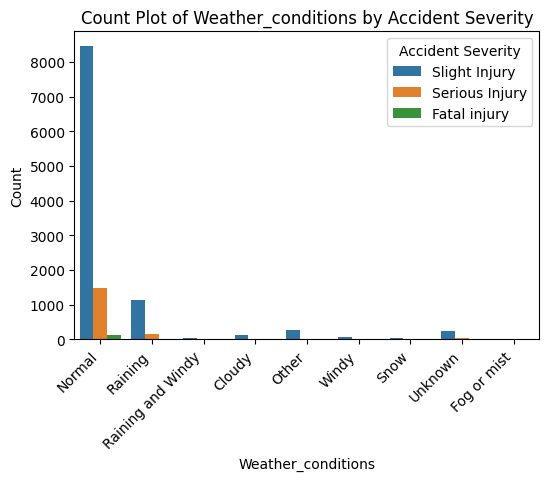

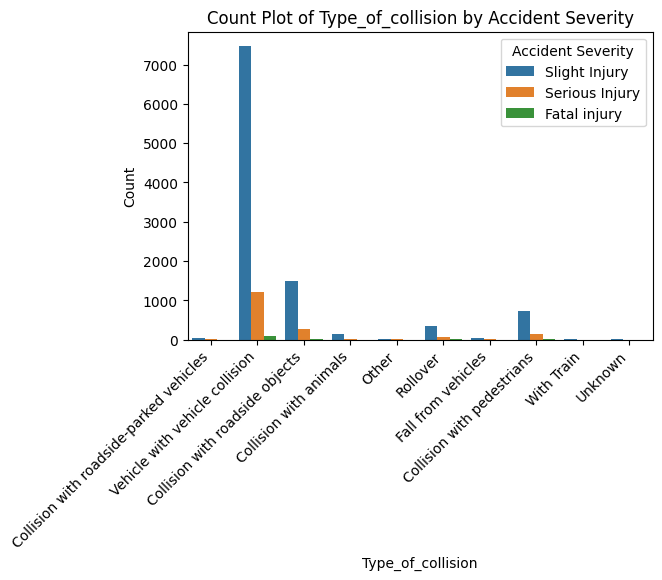

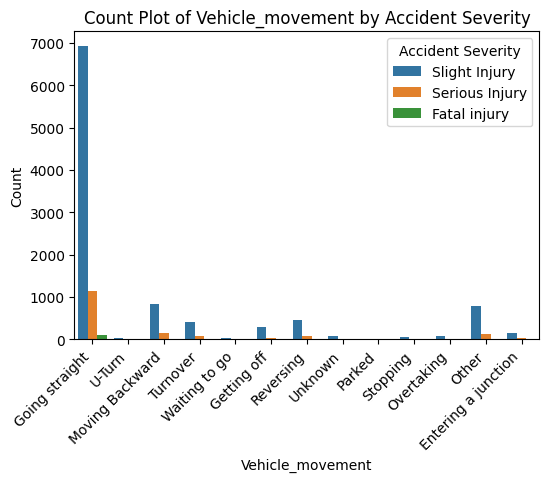

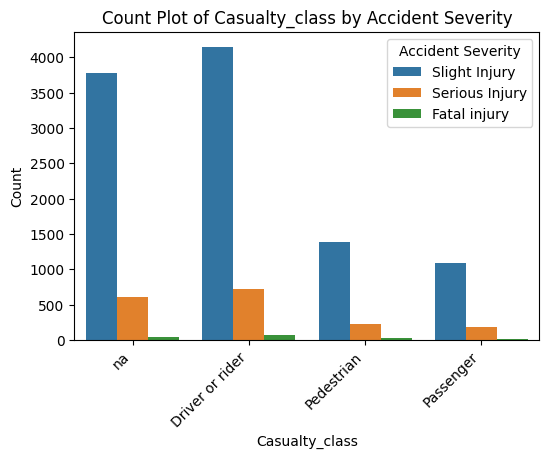

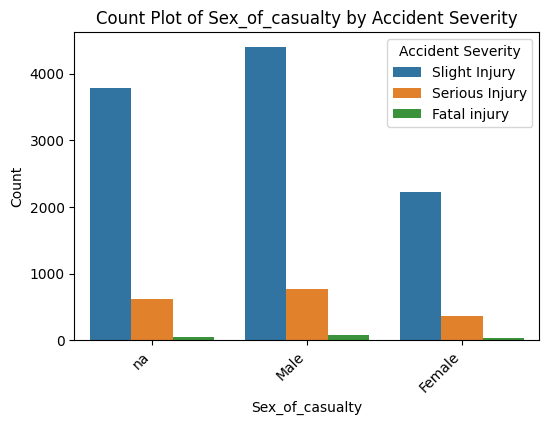

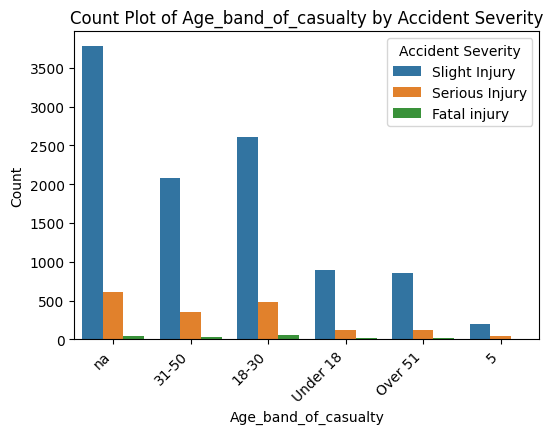

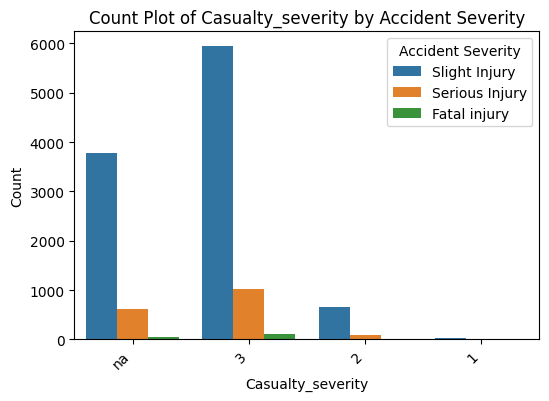

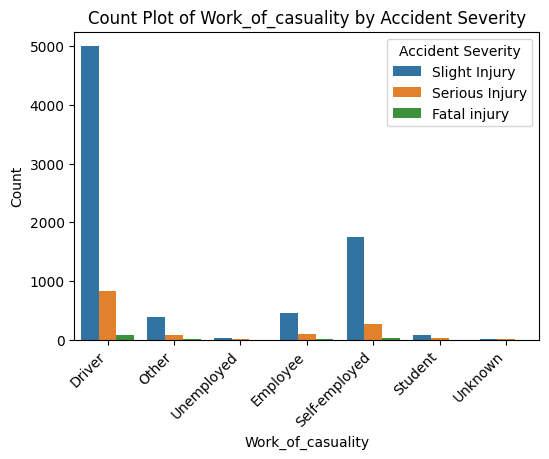

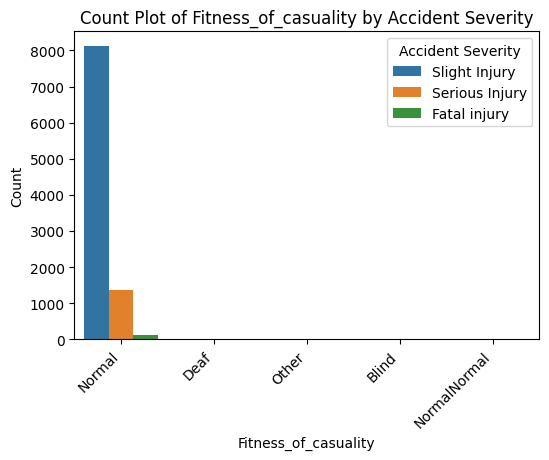

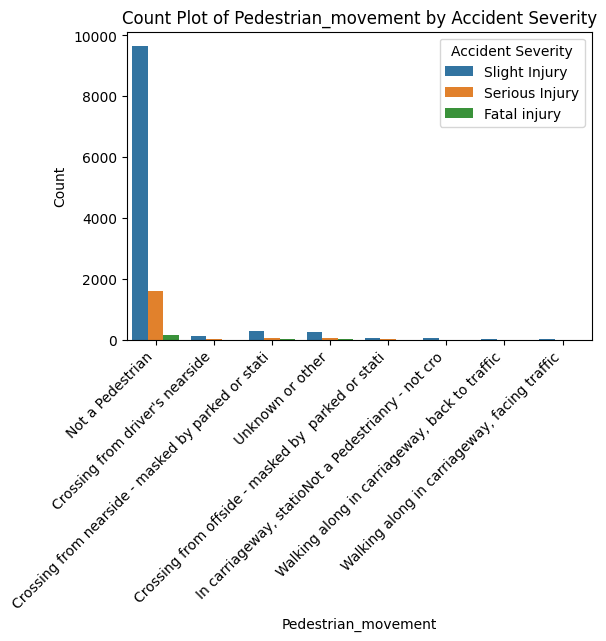

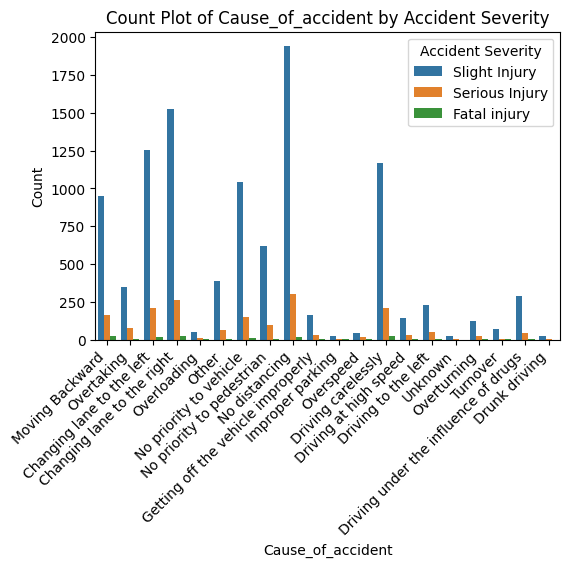

In [18]:
# Extracting categorical columns from the dataset, apart from 2 columns, rest
# all 29 are categorical variables
categorical_cols = [
    'Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
    'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle',
    'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
    'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
    'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
    'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
    'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident'
]

# Print the number of categorical variables
num_categorical_vars = len(categorical_cols)
print(f"Number of Categorical Variables: {num_categorical_vars}")

# Plotting count plot for target variable against each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))

    # Limit the displayed categorical values to the first 50 characters
    df[col] = df[col].apply(lambda x: x[:50] if isinstance(x, str) and len(x) > 50 else x)

    sns.countplot(x=col, hue='Accident_severity', data=df)
    plt.title(f'Count Plot of {col} by Accident Severity')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Accident Severity')
    plt.show()

In [19]:
# Dropping 2 columns, as atated above
df.drop(['Defect_of_vehicle', 'Fitness_of_casuality'], axis=1, inplace=True)

In [20]:
df.shape

(12316, 30)

In [21]:
# Remove specified values from list of categorical_cols
values_to_remove = ['Defect_of_vehicle', 'Fitness_of_casuality']
categorical_cols = [col for col in categorical_cols if col not in values_to_remove]
   

# We will try using SelectKbest technique next.
But before that, we need to handle null values.
This data appears to have been captured meticulosly. So wherever we
have null values, we can assume that investigation did not reveal any data, so
we will change those to 'unknown'.
'na' values will not be changed assuming they are actual values of dataset
after doing the above, we will do one hot encoding and then use SelecKbest technique

In [22]:
df.replace('Unknown', 'unknown', inplace=True) #convert Unknown to lowercase

In [23]:
# Display columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:")
print(df[null_columns].isnull().sum())

Columns with null values:
Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
dtype: int64


In [24]:
# Replace null values with 'unknown'
df.fillna('unknown', inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  int64 
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [26]:
# Perform one-hot encoding including the target variable
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

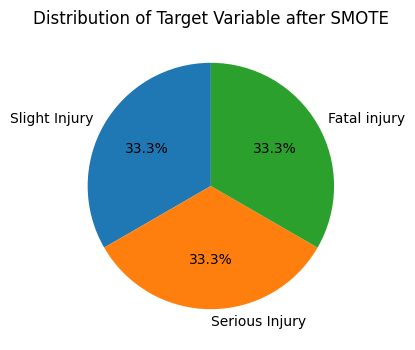

In [28]:
# Now df_encoded is one-hot encoded feature matrix, and 'Accident_severity' is the
# target variable. We will use SMOTE technique to balance the dataset
X = df_encoded.drop(columns=['Accident_severity'])
y = df_encoded['Accident_severity']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display a pie chart to show the balance after SMOTE
plt.figure(figsize=(4, 4))
plt.pie(y_resampled.value_counts(), labels=y_resampled.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable after SMOTE')
plt.show()

In [29]:
# Apply SelectKBest with K=50. Value 50 was arrived at after few iterations
# testing
X_temp = X_resampled
y_temp = y_resampled

k_best = SelectKBest(f_classif, k=50)
X_selected = k_best.fit_transform(X_temp, y_temp)

# Get the names of the selected columns
selected_columns = X_temp.columns[k_best.get_support(indices=True)]

# Display the selected column names
print("Selected Columns:", selected_columns)

Selected Columns: Index(['Number_of_vehicles_involved', 'Number_of_casualties', 'Time_7',
       'Time_8', 'Time_10', 'Time_12', 'Time_14', 'Time_17',
       'Day_of_week_Monday', 'Day_of_week_Sunday', 'Day_of_week_Tuesday',
       'Day_of_week_Wednesday', 'Age_band_of_driver_31-50',
       'Age_band_of_driver_Over 51', 'Age_band_of_driver_unknown',
       'Educational_level_Elementary school', 'Educational_level_High school',
       'Vehicle_driver_relation_Owner', 'Driving_experience_5-10yr',
       'Driving_experience_Above 10yr', 'Driving_experience_Below 1yr',
       'Type_of_vehicle_Lorry (41?100Q)', 'Type_of_vehicle_Other',
       'Type_of_vehicle_Pick up upto 10Q', 'Type_of_vehicle_unknown',
       'Service_year_of_vehicle_5-10yrs', 'Service_year_of_vehicle_Above 10yr',
       'Area_accident_occured_ Church areas',
       'Area_accident_occured_Office areas', 'Area_accident_occured_Other',
       'Lanes_or_Medians_Two-way (divided with broken lines road marking)',
       'Lanes

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

In [31]:
# Defining below the 5 models selected for training
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=500),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
}

In [32]:
# Initialize metrics dictionaries
train_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Confusion Matrix': []}
test_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Confusion Matrix': []}
 

In [33]:
# Train and evaluate models
for name, model in models.items():
    if name == 'LogisticRegression':
        # Scale the data for Logistic Regression, it wasn't converging otherwise
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

    # Training set metrics
    train_preds = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)
    train_precision = precision_score(y_train, train_preds, average='weighted')
    train_recall = recall_score(y_train, train_preds, average='weighted')
    train_f1 = f1_score(y_train, train_preds, average='weighted')

    # Testing set metrics
    test_preds = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_preds)
    test_precision = precision_score(y_test, test_preds, average='weighted')
    test_recall = recall_score(y_test, test_preds, average='weighted')
    test_f1 = f1_score(y_test, test_preds, average='weighted')

    # Confusion matrices
    cm_train = confusion_matrix(y_train, train_preds)
    cm_test = confusion_matrix(y_test, test_preds)

    # Append metrics to dictionaries
    train_metrics['Model'].append(name)
    train_metrics['Accuracy'].append(train_accuracy)
    train_metrics['Precision'].append(train_precision)
    train_metrics['Recall'].append(train_recall)
    train_metrics['F1 Score'].append(train_f1)
    train_metrics['Confusion Matrix'].append(cm_train)

    test_metrics['Model'].append(name)
    test_metrics['Accuracy'].append(test_accuracy)
    test_metrics['Precision'].append(test_precision)
    test_metrics['Recall'].append(test_recall)
    test_metrics['F1 Score'].append(test_f1)
    test_metrics['Confusion Matrix'].append(cm_test)

In [34]:
# Display the training and testing metrics in tables
train_df = pd.DataFrame(train_metrics).set_index('Model')
test_df = pd.DataFrame(test_metrics).set_index('Model')

print("Training Set Metrics:")
print(train_df)

print("\nTesting Set Metrics:")
print(test_df)

Training Set Metrics:
                    Accuracy  Precision    Recall  F1 Score  \
Model                                                         
RandomForest        0.990198   0.990367  0.990198  0.990198   
GradientBoosting    0.790927   0.790343  0.790927  0.790530   
LogisticRegression  0.345815   0.467475  0.345815  0.192390   
SVM                 0.863058   0.862079  0.863058  0.860607   
DecisionTree        0.990238   0.990407  0.990238  0.990239   

                                                     Confusion Matrix  
Model                                                                  
RandomForest            [[8323, 7, 0], [205, 8108, 2], [4, 27, 8320]]  
GradientBoosting    [[7088, 1129, 113], [1227, 5830, 1258], [285, ...  
LogisticRegression    [[283, 132, 7915], [5, 13, 8297], [3, 0, 8348]]  
SVM                 [[8003, 249, 78], [973, 6151, 1191], [100, 832...  
DecisionTree            [[8323, 7, 0], [205, 8110, 0], [4, 28, 8319]]  

Testing Set Metrics:
          

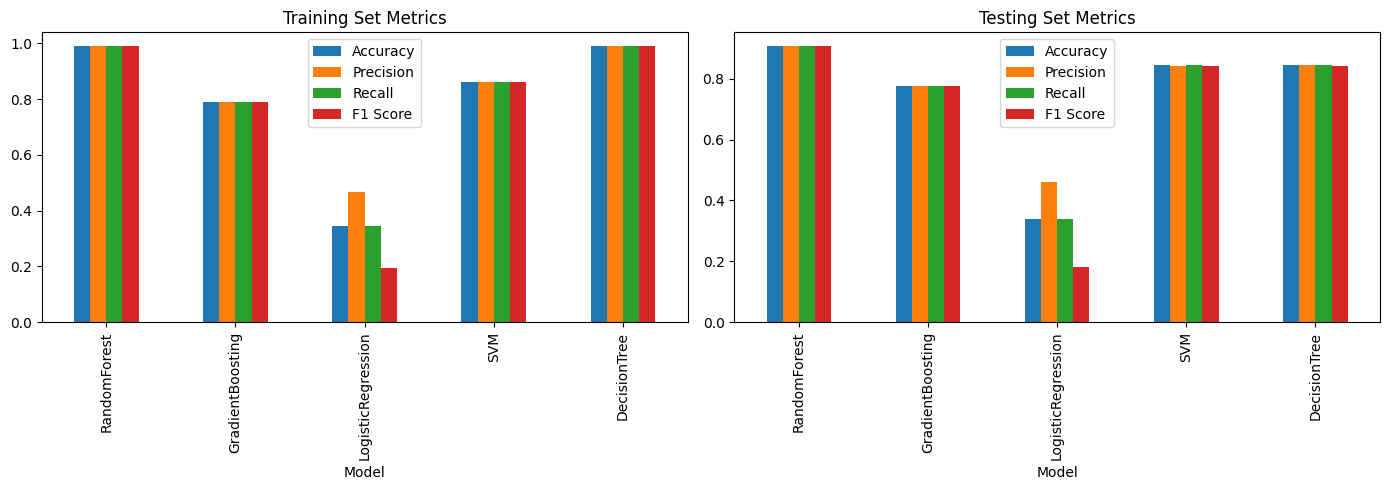

In [35]:
# Display metrics in a bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for training set metrics
train_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Training Set Metrics')

# Bar chart for testing set metrics
test_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Testing Set Metrics')

plt.tight_layout()
plt.show()

RandomForest and DecionTree provide the best results, both on training and testing
data sets. Logisticsregression has poorest results.